In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.cluster import KMeans
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA


In [3]:
# read xlsx
df = pd.read_excel('Online Retail.xlsx')

# print info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None


In [4]:
df.head(40)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


# Data cleaning

## Missing Value

In [6]:
# Count the missing value
df.isnull().sum()[df.isna().sum() > 0]

Description      1454
CustomerID     135080
dtype: int64

In [7]:
# Group by InvoiceDate and Country, then fill missing values in CustomerID
df_Filled = df.copy()
df_Filled['CustomerID'] = df_Filled.groupby(['InvoiceDate', 'Country'])['CustomerID'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

# Check the result after filling
print(df_Filled[df_Filled['CustomerID'].isna()])

C:\Users\Georg\AppData\Local\Temp\ipykernel_23704\1319057313.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_Filled['CustomerID'] = df_Filled.groupby(['InvoiceDate', 'Country'])['CustomerID'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))


       InvoiceNo StockCode                      Description  Quantity  \
622       536414     22139                              NaN        56   
1443      536544     21773  DECORATIVE ROSE BATHROOM BOTTLE         1   
1444      536544     21774  DECORATIVE CATS BATHROOM BOTTLE         2   
1445      536544     21786               POLKADOT RAIN HAT          4   
1446      536544     21787            RAIN PONCHO RETROSPOT         2   
...          ...       ...                              ...       ...   
541536    581498    85099B          JUMBO BAG RED RETROSPOT         5   
541537    581498    85099C   JUMBO  BAG BAROQUE BLACK WHITE         4   
541538    581498     85150    LADIES & GENTLEMEN METAL SIGN         1   
541539    581498     85174                S/4 CACTI CANDLES         1   
541540    581498       DOT                   DOTCOM POSTAGE         1   

               InvoiceDate  UnitPrice  CustomerID         Country  
622    2010-12-01 11:52:00       0.00         NaN  Unit

In [9]:
# Remove rows where Description is missing (null)
df_Filled = df_Filled.dropna(subset=['Description'])

# Print info to verify the removal
print("Number of rows with missing Description removed:", df_Filled['Description'].isnull().sum())
print("Current shape of dataframe:", df.shape)

Number of rows with missing Description removed: 0
Current shape of dataframe: (541909, 8)


In [10]:
# Count the missing value
df_Filled.isnull().sum()[df.isna().sum() > 0]

Description         0
CustomerID     125277
dtype: int64

There are still 1/3 missing value!However, we cannot ignore and delete them because that will affect data sufficiency and diversity.We have to find out some solution!

In [11]:
# Create a copy of df_Filled to df_Filled_All
df_Filled_All = df_Filled.copy()

# Find the missing CustomerID values
missing_customer_ids = df_Filled_All[df_Filled_All['CustomerID'].isna()]

# Collect all existing CustomerIDs
existing_customer_ids = df_Filled_All['CustomerID'].dropna().unique()
existing_customer_ids = set(existing_customer_ids)

# Determine the range of CustomerIDs (assume they are 5-digit numbers)
min_id = int(min(existing_customer_ids))
max_id = int(max(existing_customer_ids))

# Create a list of available CustomerIDs in the range that are not used
available_ids = [i for i in range(min_id, max_id + 1) if i not in existing_customer_ids]

# Step 1: Assign a group ID to each group of missing CustomerID rows with the same Country and InvoiceDate
missing_customer_ids['GroupID'] = missing_customer_ids.groupby(['Country', 'InvoiceDate']).ngroup() + 1

# Step 2: Check if there are enough available IDs in the range
if len(available_ids) < len(missing_customer_ids['GroupID'].unique()):
    print("Range of unused CustomerIDs is insufficient, generating new IDs")
    # Generate new IDs starting from max_id + 1
    additional_ids_needed = len(missing_customer_ids['GroupID'].unique()) - len(available_ids)
    new_ids = list(range(max_id + 1, max_id + 1 + additional_ids_needed))
    available_ids.extend(new_ids)

# Step 3: Assign available CustomerIDs to each group (ensuring no repetition)
random.shuffle(available_ids)
group_to_id_mapping = dict(zip(missing_customer_ids['GroupID'].unique(), available_ids[:len(missing_customer_ids['GroupID'].unique())]))
missing_customer_ids['CustomerID'] = missing_customer_ids['GroupID'].map(group_to_id_mapping)
df_Filled_All.loc[missing_customer_ids.index, 'CustomerID'] = missing_customer_ids['CustomerID']
print("Filled missing value success")

# Drop the temporary GroupID column
missing_customer_ids.drop(columns=['GroupID'], inplace=True)

Range of unused CustomerIDs is insufficient, generating new IDs
Filled missing value success


C:\Users\Georg\AppData\Local\Temp\ipykernel_23704\1032686316.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_customer_ids['GroupID'] = missing_customer_ids.groupby(['Country', 'InvoiceDate']).ngroup() + 1
C:\Users\Georg\AppData\Local\Temp\ipykernel_23704\1032686316.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_customer_ids['CustomerID'] = missing_customer_ids['GroupID'].map(group_to_id_mapping)
C:\Users\Georg\AppData\Local\Temp\ipykernel_23704\1032686316.py:37: SettingWithCopyWar

In [12]:
# print info
print(df_Filled_All.info())

<class 'pandas.core.frame.DataFrame'>
Index: 540455 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    540455 non-null  object        
 1   StockCode    540455 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     540455 non-null  int64         
 4   InvoiceDate  540455 non-null  datetime64[ns]
 5   UnitPrice    540455 non-null  float64       
 6   CustomerID   540455 non-null  float64       
 7   Country      540455 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 53.2+ MB
None


In [13]:
# Count the missing value
df_Filled.isnull().sum()[df.isna().sum() > 0]

Description         0
CustomerID     125277
dtype: int64

## Outlier Handling

In [14]:
# Create a new column 'Cancellation' to mark cancellation status
df_Filled_All['Cancellation'] = 0

# Mark rows where InvoiceNo starts with 'C' and Quantity is negative as -1 (cancellations)
df_Filled_All.loc[df_Filled_All['InvoiceNo'].str.startswith('C', na=False) & (df_Filled_All['Quantity'] < 0), 'Cancellation'] = -1

# Mark rows where InvoiceNo does not start with 'C' but Quantity is negative or starts with 'C' and Quantity is positive as 0 (anomalies)
df_Filled_All.loc[(~df_Filled_All['InvoiceNo'].str.startswith('C', na=False) & (df_Filled_All['Quantity'] < 0)) | (df_Filled_All['InvoiceNo'].str.startswith('C', na=False) & (df_Filled_All['Quantity'] > 0)), 'Cancellation'] = 0

# Mark rows where InvoiceNo does not start with 'C' and Quantity is positive as 1 (normal transactions)
df_Filled_All.loc[(~df_Filled_All['InvoiceNo'].str.startswith('C', na=False)) & (df_Filled_All['Quantity'] > 0), 'Cancellation'] = 1

# ========= InvoiceNo Cleanup =========
# Remove the leading 'C' from InvoiceNo to convert it to numerical type

invoice_backup = df_Filled_All['InvoiceNo'].copy()
df_Filled_All['InvoiceNo'] = df_Filled_All['InvoiceNo'].str.replace(r'[^0-9]', '', regex=True)

# Fill missing or empty InvoiceNo entries with unique values starting from max existing InvoiceNo + 1
df_Filled_All['InvoiceNo'] = pd.to_numeric(df_Filled_All['InvoiceNo'], errors='coerce')
missing_invoices = df_Filled_All['InvoiceNo'].isna()
if missing_invoices.any():
    max_invoice = df_Filled_All['InvoiceNo'].max()
    df_Filled_All.loc[missing_invoices, 'InvoiceNo'] = range(int(max_invoice) + 1, int(max_invoice) + 1 + missing_invoices.sum())

# Convert InvoiceNo to integer
df_Filled_All['InvoiceNo'] = df_Filled_All['InvoiceNo'].astype(int)
df_Filled_All['InvoiceNo'] = df_Filled_All['InvoiceNo'].astype(int)


In [15]:
# print info
print(df_Filled_All.info())

<class 'pandas.core.frame.DataFrame'>
Index: 540455 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     540455 non-null  int32         
 1   StockCode     540455 non-null  object        
 2   Description   540455 non-null  object        
 3   Quantity      540455 non-null  int64         
 4   InvoiceDate   540455 non-null  datetime64[ns]
 5   UnitPrice     540455 non-null  float64       
 6   CustomerID    540455 non-null  float64       
 7   Country       540455 non-null  object        
 8   Cancellation  540455 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(2), object(3)
memory usage: 55.3+ MB
None


In [16]:
df_Filled_All.head(25)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancellation
0,581570,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1
1,581571,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1
2,581572,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1
3,581573,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1
4,581574,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1
5,581575,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,1
6,581576,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,1
7,581577,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,1
8,581578,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,1
9,581579,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,1


## Handle Duplicates

In [17]:
# Handle duplicates where all columns are identical
# Drop duplicates based on all columns, keeping the first occurrence
df_Filled_All = df_Filled_All.drop_duplicates(keep='first')
print(f'After removing fully identical duplicate rows, remaining rows: {len(df_Filled_All)}')

After removing fully identical duplicate rows, remaining rows: 540418


In [18]:
# print info
print(df_Filled_All.info())

<class 'pandas.core.frame.DataFrame'>
Index: 540418 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     540418 non-null  int32         
 1   StockCode     540418 non-null  object        
 2   Description   540418 non-null  object        
 3   Quantity      540418 non-null  int64         
 4   InvoiceDate   540418 non-null  datetime64[ns]
 5   UnitPrice     540418 non-null  float64       
 6   CustomerID    540418 non-null  float64       
 7   Country       540418 non-null  object        
 8   Cancellation  540418 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(2), object(3)
memory usage: 39.2+ MB
None


## Date and Time Extraction

In [19]:
# ========= Date and Time Extraction =========
# Extract Date and Time from InvoiceDate
# Create new 'Date' and 'Time' columns for seasonal analysis and time series forecasting
df_Cleaned=df_Filled_All.copy()
df_Cleaned['Date'] = df_Cleaned['InvoiceDate'].dt.date
df_Cleaned['Time'] = df_Cleaned['InvoiceDate'].dt.time

In [20]:
df_Cleaned.head(25)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancellation,Date,Time
0,581570,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1,2010-12-01,08:26:00
1,581571,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010-12-01,08:26:00
2,581572,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1,2010-12-01,08:26:00
3,581573,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010-12-01,08:26:00
4,581574,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010-12-01,08:26:00
5,581575,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,1,2010-12-01,08:26:00
6,581576,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,1,2010-12-01,08:26:00
7,581577,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,1,2010-12-01,08:28:00
8,581578,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,1,2010-12-01,08:28:00
9,581579,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,1,2010-12-01,08:34:00


# EDA

# Pre-processing

## Data Engineering

In [21]:
pin_date = max(df_Cleaned['Date']) + dt.timedelta(1)
pin_date

datetime.date(2011, 12, 10)

In [22]:
df_Cleaned['TotalSum'] = df_Cleaned['Quantity'] * df_Cleaned['UnitPrice']
df_Cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancellation,Date,Time,TotalSum
0,581570,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1,2010-12-01,08:26:00,15.30
1,581571,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010-12-01,08:26:00,20.34
2,581572,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1,2010-12-01,08:26:00,22.00
3,581573,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010-12-01,08:26:00,20.34
4,581574,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010-12-01,08:26:00,20.34


In [23]:
rfm = df_Cleaned.groupby('CustomerID').agg({
    'Date': lambda x: (pin_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalSum': 'sum'
})
rfm

,Date,InvoiceNo,TotalSum
CustomerID,,,
12346.0,326,2,0.00
12347.0,3,182,4310.00
12348.0,76,31,1797.24
12349.0,19,73,1757.55
12350.0,311,17,334.40
...,...,...,...
18599.0,15,1,0.00
18600.0,264,1,7.65
18601.0,253,68,863.54


In [25]:
rfm.rename(columns= {
    'Date': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalSum': 'Monetary'
}, inplace=True)
rfm

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,2,0.00
12347.0,3,182,4310.00
12348.0,76,31,1797.24
12349.0,19,73,1757.55
12350.0,311,17,334.40
...,...,...,...
18599.0,15,1,0.00
18600.0,264,1,7.65
18601.0,253,68,863.54


In [27]:
r_labels = range(4, 0, -1) #[4, 3, 2, 1]
r_groups = pd.qcut(rfm['Recency'], q=4, labels=r_labels)
f_labels = range(1, 5) # [1, 2, 3, 4]
f_groups = pd.qcut(rfm['Frequency'], q=4, labels=f_labels)
m_labels = range(1, 5)
m_groups = pd.qcut(rfm['Monetary'], q=4, labels=m_labels)

In [28]:
rfm['R'] = r_groups.values
rfm['F'] = f_groups.values
rfm['M'] = m_groups.values
rfm

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346.0,326,2,0.00,1,1,1
12347.0,3,182,4310.00,4,4,4
12348.0,76,31,1797.24,2,2,4
12349.0,19,73,1757.55,4,3,4
12350.0,311,17,334.40,1,2,2
...,...,...,...,...,...,...
18599.0,15,1,0.00,4,1,1
18600.0,264,1,7.65,1,1,1
18601.0,253,68,863.54,1,3,3


## Customer Clustering Recommendation for Targeted Marketing

In [29]:
X = rfm[['R', 'F', 'M']]
kmeans = KMeans(n_clusters=10, init='k-means++', max_iter=300)
kmeans.fit(X)

KMeans(n_clusters=10)

In [30]:
kmeans.labels_

array([5, 7, 6, ..., 6, 2, 5])

In [31]:
rfm['kmeans_cluster'] = kmeans.labels_

In [32]:
rfm

,Recency,Frequency,Monetary,R,F,M,kmeans_cluster
CustomerID,,,,,,,
12346.0,326,2,0.00,1,1,1,5
12347.0,3,182,4310.00,4,4,4,7
12348.0,76,31,1797.24,2,2,4,6
12349.0,19,73,1757.55,4,3,4,7
12350.0,311,17,334.40,1,2,2,1
...,...,...,...,...,...,...,...
18599.0,15,1,0.00,4,1,1,2
18600.0,264,1,7.65,1,1,1,5
18601.0,253,68,863.54,1,3,3,6


In [33]:
rfm[rfm['kmeans_cluster'] == 0]

,Recency,Frequency,Monetary,R,F,M,kmeans_cluster
CustomerID,,,,,,,
12364.0,8,85,1313.10,4,3,3,0
12391.0,22,100,460.89,4,4,2,0
12421.0,16,46,806.27,4,3,3,0
12427.0,12,35,708.37,4,3,3,0
12462.0,3,72,1124.01,4,3,3,0
...,...,...,...,...,...,...,...
18158.0,10,35,451.75,4,3,2,0
18167.0,4,43,1355.51,4,3,3,0
18221.0,23,65,1033.31,4,3,3,0


Maximum Unit Price Value (after filtering outliers): 8.33
Minimum Unit Price Value (after filtering outliers): 0.0
Median Unit Price Value: 1.95


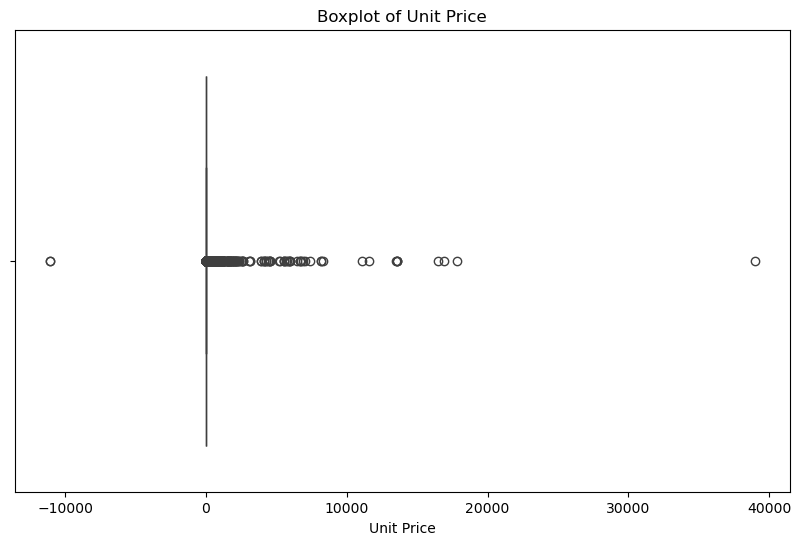

In [64]:
# Step 6: Calculate the maximum, minimum, and median of the 'UnitPrice' column, excluding outliers using IQR method
# Calculate IQR to filter out outliers
Q1 = df_Cleaned['UnitPrice'].quantile(0.25)
Q3 = df_Cleaned['UnitPrice'].quantile(0.75)
IQR = Q3 - Q1

# Filter the data to remove outliers
filtered_prices = df_Cleaned[(df_Cleaned['UnitPrice'] >= (Q1 - 1.5 * IQR)) & (df_Cleaned['UnitPrice'] <= (Q3 + 1.5 * IQR))]['UnitPrice']

# Calculate max, min, and median values after filtering outliers
max_price = filtered_prices.max()
min_price = filtered_prices.min()
median_price = filtered_prices.median()

print(f"Maximum Unit Price Value (after filtering outliers): {max_price}")
print(f"Minimum Unit Price Value (after filtering outliers): {min_price}")
print(f"Median Unit Price Value: {median_price}")

# Step 7: Boxplot to visualize the distribution and check for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_Cleaned['UnitPrice'])
plt.title('Boxplot of Unit Price')
plt.xlabel('Unit Price')
plt.show()


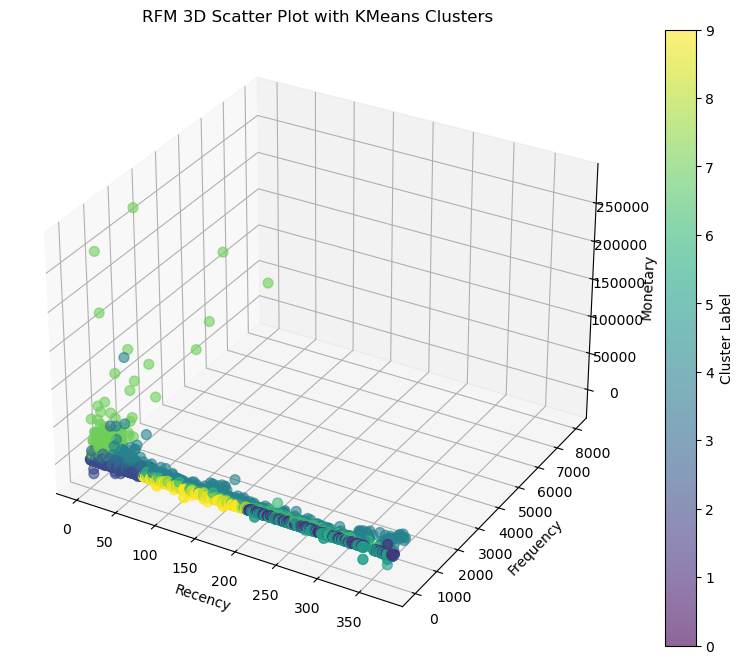

In [34]:
# Create a figure object
fig = plt.figure(figsize=(10, 8))

# Create a 3D axis object
ax = fig.add_subplot(111, projection='3d')

# Scatter plot using the R, F, M values
sc = ax.scatter(rfm['Recency'], rfm['Frequency'], rfm['Monetary'], 
                c=rfm['kmeans_cluster'], cmap='viridis', s=50, alpha=0.6)

# Set axis labels
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

# Set plot title
ax.set_title('RFM 3D Scatter Plot with KMeans Clusters')

# Add color bar to show cluster associations
plt.colorbar(sc, ax=ax, label='Cluster Label')

# Show the plot
plt.show()


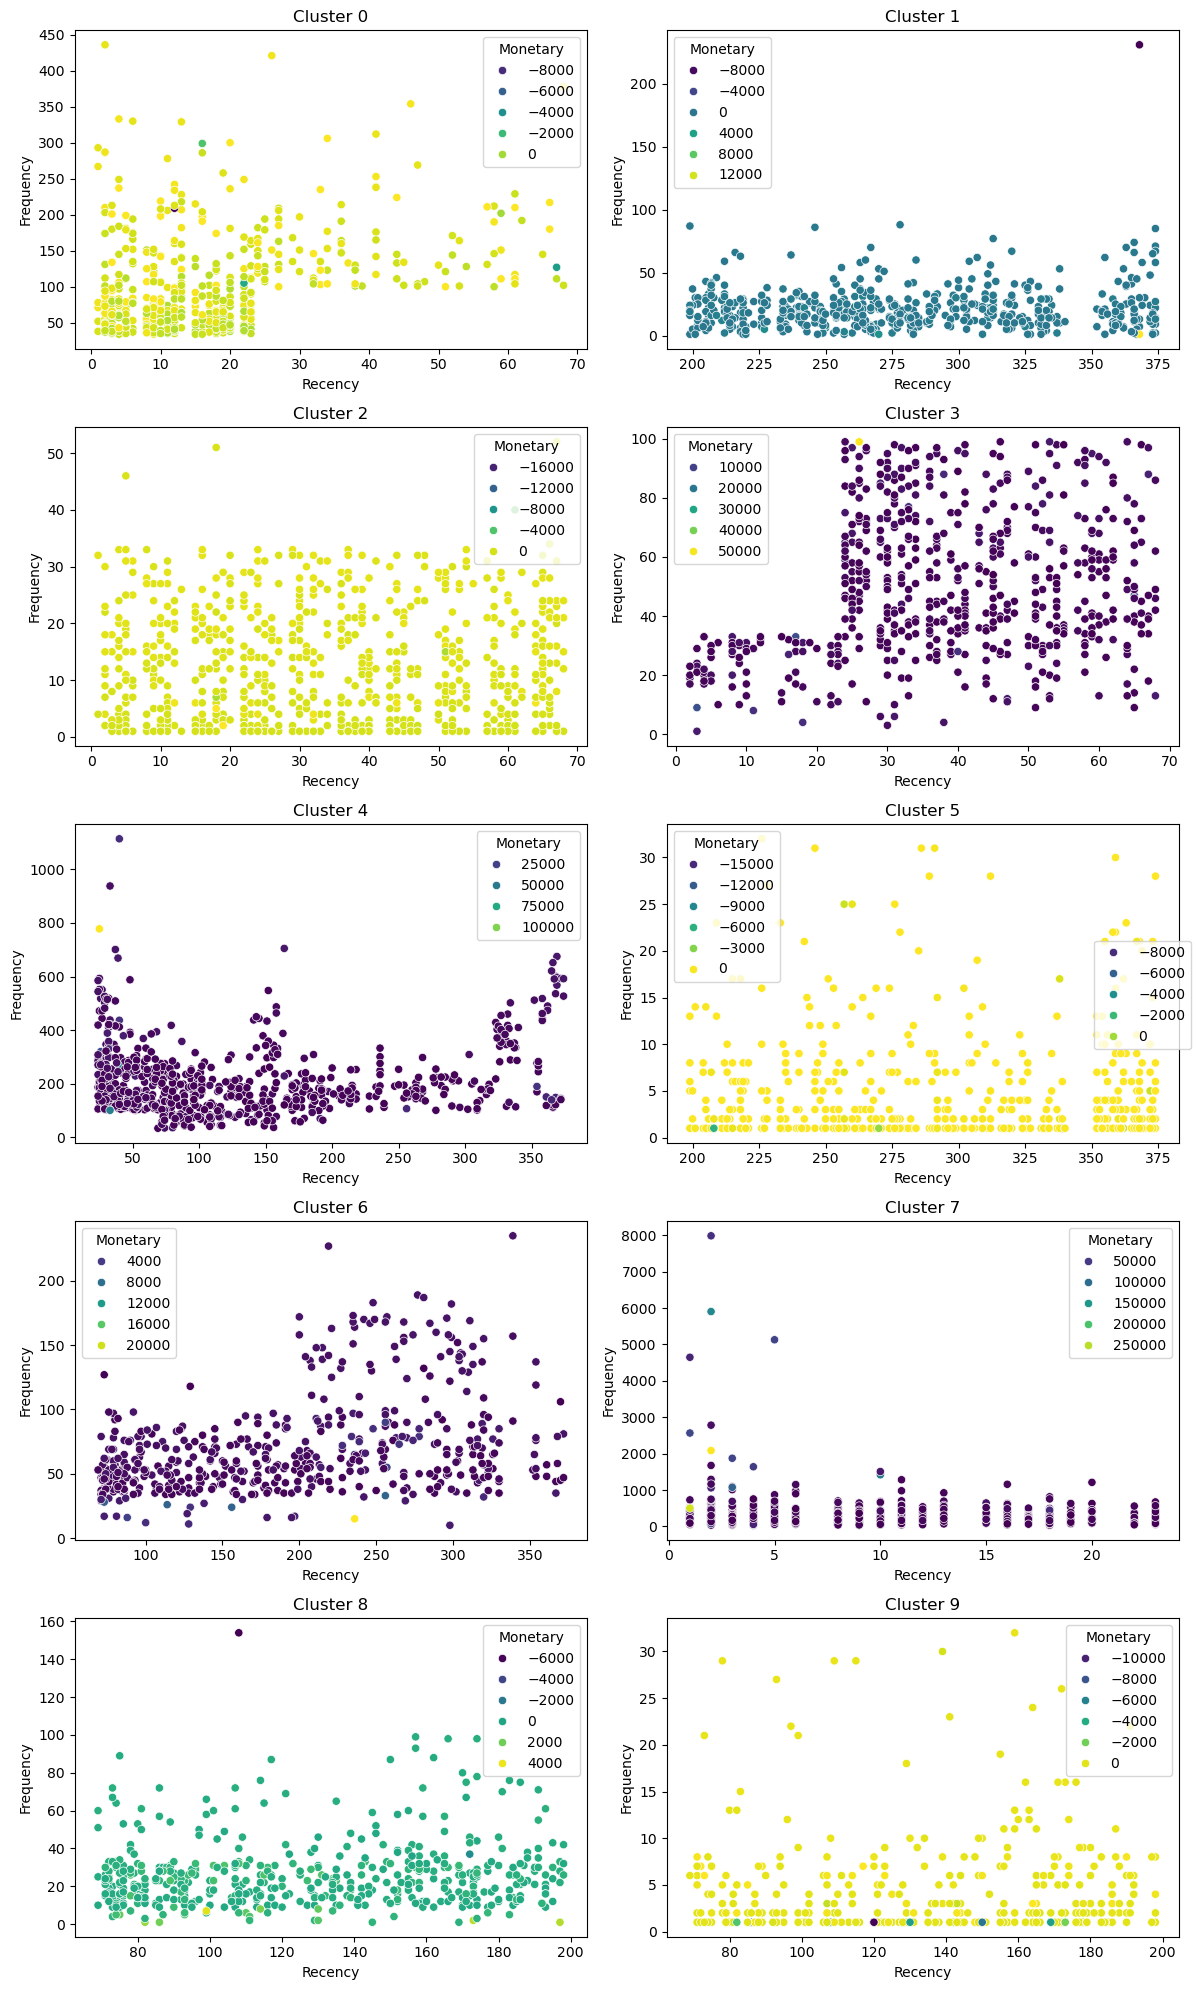

In [35]:
# Number of clusters
num_clusters = 10

# Create subplots with two clusters in each row
fig, axes = plt.subplots(num_clusters // 2, 2, figsize=(12, 20))

# Flatten the axes array to iterate through subplots
axes = axes.ravel()

# Loop through each cluster and plot it
for cluster_id in range(num_clusters):
    # Filter data for the current cluster
    cluster_data = rfm[rfm['kmeans_cluster'] == cluster_id]
    
    # Plot the data with a distinct color
    sns.scatterplot(data=cluster_data, x='Recency', y='Frequency', hue='Monetary', palette='viridis', ax=axes[cluster_id])
    
    # Set the title for the subplot
    axes[cluster_id].set_title(f'Cluster {cluster_id}')
    
    # Customize axes labels, if needed
    # axes[cluster_id].set_xlabel('X-axis Label')
    # axes[cluster_id].set_ylabel('Y-axis Label')

# Add a common legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='center right')

# Adjust subplot spacing
plt.tight_layout()

# Show the plot
plt.show()

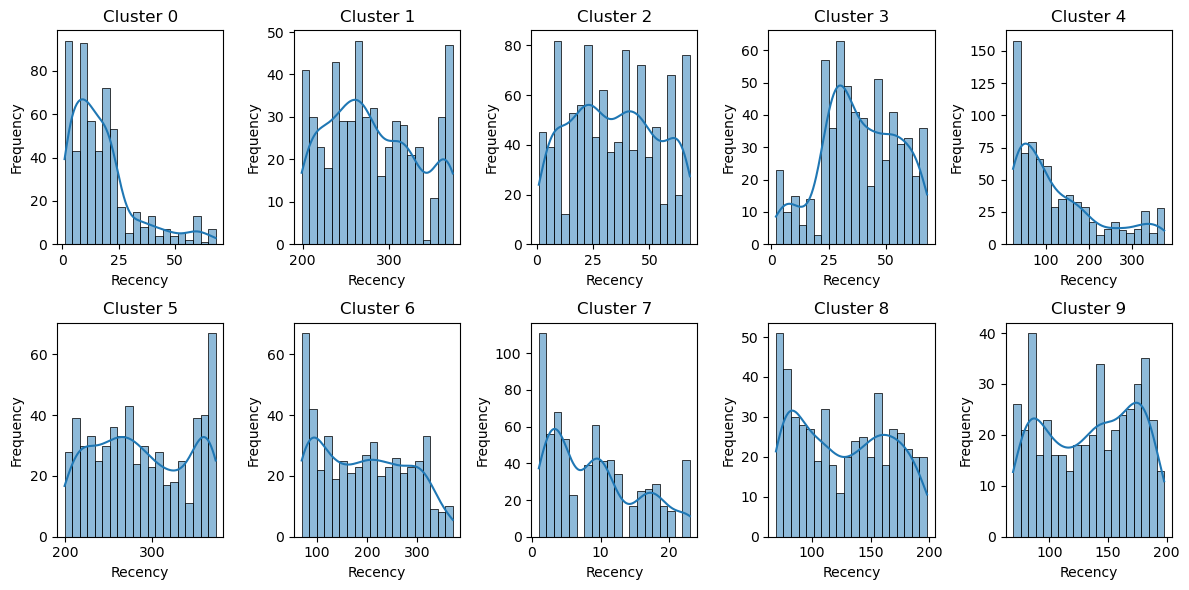

In [36]:
# Create a histogram for Recency in each cluster
plt.figure(figsize=(12, 6))
for cluster_id in range(num_clusters):
    plt.subplot(2, 5, cluster_id + 1)
    sns.histplot(rfm[rfm['kmeans_cluster'] == cluster_id]['Recency'], bins=20, kde=True)
    plt.title(f'Cluster {cluster_id}')
    plt.xlabel('Recency')
    plt.ylabel('Frequency')
    
plt.tight_layout()
plt.show()

# Creating Recommendation System

### Generating Top Product Recommendations for Each Cluster

In [37]:
# Number of clusters (groups)
num_clusters = 10

# Create an empty dictionary to store recommendations for each cluster
cluster_recommendations = {}

# Loop through each cluster
for cluster_id in range(num_clusters):
    # Find customers in the current cluster
    customers_in_cluster = rfm[rfm['kmeans_cluster'] == cluster_id].index
    
    # Find top products for customers in the current cluster
    top_products_for_cluster = df[df['CustomerID'].isin(customers_in_cluster)].groupby(['StockCode'])['InvoiceNo'].count().sort_values(ascending=False).head(10)
    
    # Store the top products for the current cluster in the dictionary
    cluster_recommendations[f'Cluster {cluster_id}'] = top_products_for_cluster.index.tolist()

# Display the recommendations for each cluster
for cluster, recommended_products in cluster_recommendations.items():
    print(f"{cluster} -> Recommended Products: {recommended_products}")

Cluster 0 -> Recommended Products: [21034, '85123A', 22086, 23084, 84879, 22469, 22423, 20727, 22197, 23301]
Cluster 1 -> Recommended Products: ['85123A', 22423, 47566, 22457, 'POST', 84879, 21034, 22960, 22969, 22699]
Cluster 2 -> Recommended Products: [84879, 'POST', 22423, 22138, '85123A', 22086, 84946, 23355, 22457, 22578]
Cluster 3 -> Recommended Products: [22423, 84879, 'POST', '85123A', '85099B', 47566, 21034, 22086, 22138, 22720]
Cluster 4 -> Recommended Products: ['85123A', 22423, '85099B', 47566, 20725, 84879, 22720, 22383, 23298, 22382]
Cluster 5 -> Recommended Products: ['85123A', 21034, 22423, 22469, 'M', 72741, 37446, 22697, 47566, 22502]
Cluster 6 -> Recommended Products: [22423, '85123A', 84879, 22960, 47566, 'POST', 21212, 22720, 22138, 22961]
Cluster 7 -> Recommended Products: ['85123A', '85099B', 22423, 20725, 47566, 22197, 23203, 20727, 84879, 22720]
Cluster 8 -> Recommended Products: ['85123A', 47566, 22423, 'POST', 22960, 84879, 21034, 23298, 21212, 22720]
Cluster

### Cluster Analysis: Product Recommendations

In [38]:
def generate_cluster_recommendations(num_clusters, num_customers_to_display, rfm, df):
    # Create an empty dictionary to store recommendations for each cluster
    cluster_recommendations = {}

    # Loop through each cluster
    for cluster_id in range(num_clusters):
        # Find customers in the current cluster
        customers_in_cluster = rfm[rfm['kmeans_cluster'] == cluster_id].index

        # Find top products for customers in the current cluster
        top_products_for_cluster = df[df['CustomerID'].isin(customers_in_cluster)].groupby(['StockCode'])['InvoiceNo'].count().sort_values(ascending=False).head(10)

        # Find customers who haven't purchased any of the top products in the current cluster
        non_buyers = [customer for customer in customers_in_cluster if not (df[(df['CustomerID'] == customer) & (df['StockCode'].isin(top_products_for_cluster.index.tolist()))]).empty]


        # Limit the number of non-buyers to the specified number
        num_customers_to_display = min(num_customers_to_display, len(non_buyers))

        # Select non-buyer customers for the current cluster
        selected_customers = non_buyers[:num_customers_to_display]

        # Store the top products and selected non-buyer customers for the current cluster in the dictionary
        cluster_recommendations[f'Cluster {cluster_id}'] = {
            'Recommended Products': top_products_for_cluster.index.tolist(),
            'Selected Non-Buyer Customers': selected_customers
        }

    return cluster_recommendations

# Example usage:
num_clusters = 10
num_customers_to_display = 5

# Assuming already have 'rfm' and 'df' dataframes
cluster_recommendations = generate_cluster_recommendations(num_clusters, num_customers_to_display, rfm, df)

# Display the recommendations and selected non-buyer customers for each cluster
for cluster, recommendations_and_customers in cluster_recommendations.items():
    print(f"{cluster} ->")
    print("Recommended Products:")
    for customer_id in recommendations_and_customers['Selected Non-Buyer Customers']:
        print(f"Customer: {customer_id} =====>>>> Recommended Products: {recommendations_and_customers['Recommended Products']}")
    print()

Cluster 0 ->
Recommended Products:
Customer: 12391.0 =====>>>> Recommended Products: [21034, '85123A', 22086, 23084, 84879, 22469, 22423, 20727, 22197, 23301]
Customer: 12427.0 =====>>>> Recommended Products: [21034, '85123A', 22086, 23084, 84879, 22469, 22423, 20727, 22197, 23301]
Customer: 12462.0 =====>>>> Recommended Products: [21034, '85123A', 22086, 23084, 84879, 22469, 22423, 20727, 22197, 23301]
Customer: 12478.0 =====>>>> Recommended Products: [21034, '85123A', 22086, 23084, 84879, 22469, 22423, 20727, 22197, 23301]
Customer: 12488.0 =====>>>> Recommended Products: [21034, '85123A', 22086, 23084, 84879, 22469, 22423, 20727, 22197, 23301]

Cluster 1 ->
Recommended Products:
Customer: 12350.0 =====>>>> Recommended Products: ['85123A', 22423, 47566, 22457, 'POST', 84879, 21034, 22960, 22969, 22699]
Customer: 12355.0 =====>>>> Recommended Products: ['85123A', 22423, 47566, 22457, 'POST', 84879, 21034, 22960, 22969, 22699]
Customer: 12361.0 =====>>>> Recommended Products: ['85123A'

## Personalized product recommendations (based on product relevance)

In [48]:
df_Cleaned.head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancellation,Date,Time,TotalSum
0,581570,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1,2010-12-01,08:26:00,15.30
1,581571,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010-12-01,08:26:00,20.34
2,581572,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1,2010-12-01,08:26:00,22.00
3,581573,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010-12-01,08:26:00,20.34
4,581574,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010-12-01,08:26:00,20.34
5,581575,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,1,2010-12-01,08:26:00,15.30
6,581576,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,1,2010-12-01,08:26:00,25.50
7,581577,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,1,2010-12-01,08:28:00,11.10
8,581578,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,1,2010-12-01,08:28:00,11.10
9,581579,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,1,2010-12-01,08:34:00,54.08


In [56]:
# Step 3: Group by 'Date' and 'Description', and check the variance of 'UnitPrice'
price_variance_summary = df_Cleaned.groupby(['Date', 'Description'])['UnitPrice'].nunique().reset_index()

# Rename the column to something meaningful
price_variance_summary = price_variance_summary.rename(columns={'UnitPrice': 'UniquePriceCounts'})

# Step 4: Filter out records where 'UniquePriceCounts' > 1
# This indicates that there are multiple unique prices for the same product on the same day
variable_price_products = price_variance_summary[price_variance_summary['UniquePriceCounts'] > 1]

# Display the records where the unit price changes frequently
print(variable_price_products)
# Step 5: Analysis conclusion (if needed)
# If variable_price_products is not empty, it implies that there are products with dynamic pricing.
if not variable_price_products.empty:
    print("There are products with potentially dynamic pricing due to supply-demand effects or Discount impact.")
else:
    print("No significant price variance detected for products on the same date.")


# Step 6: Calculate the maximum, minimum, and median of the 'UnitPrice' column, excluding negative and extreme values
# Filter out negative values and set a reasonable upper limit for maximum Unit Price
filtered_prices = df_Cleaned[(df_Cleaned['UnitPrice'] >= 0) & (df_Cleaned['UnitPrice'] < 500)]['UnitPrice']

# Calculate max, min, and median values after cleaning
max_price = filtered_prices.max()
min_price = filtered_prices.min()
median_price = filtered_prices.median()

print(f"Maximum Unit Price Value: {max_price}")
print(f"Minimum Unit Price Value: {min_price}")
print(f"Median Unit Price Value: {median_price}")

              Date                        Description  UniquePriceCounts
1       2010-12-01    SET 2 TEA TOWELS I LOVE LONDON                   2
2       2010-12-01             10 COLOUR SPACEBOY PEN                  2
5       2010-12-01    12 MESSAGE CARDS WITH ENVELOPES                  2
6       2010-12-01      12 PENCIL SMALL TUBE WOODLAND                  2
8       2010-12-01        12 PENCILS SMALL TUBE SKULL                  2
...            ...                                ...                ...
278906  2011-12-09             WOODLAND CHARLOTTE BAG                  2
278907  2011-12-09             WOODLAND MINI BACKPACK                  2
278909  2011-12-09  WORLD WAR 2 GLIDERS ASSTD DESIGNS                  2
278922  2011-12-09    YOU'RE CONFUSING ME METAL SIGN                   3
278928  2011-12-09   ZINC WILLIE WINKIE  CANDLE STICK                  2

[56676 rows x 3 columns]
There are products with potentially dynamic pricing due to supply-demand effects or Discount impac

<Figure size 1200x800 with 0 Axes>

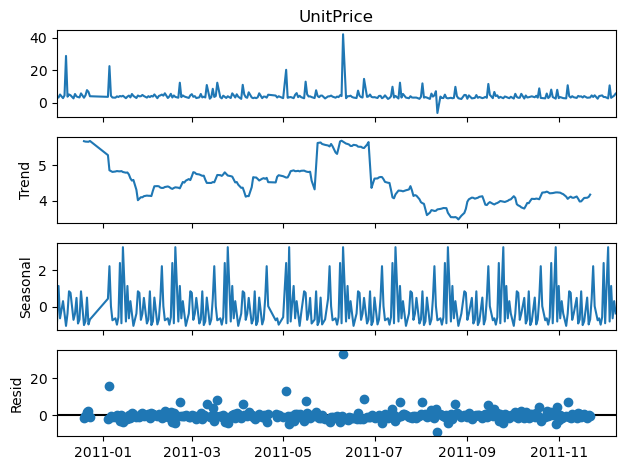

In [69]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
# Step 8: Time Series Analysis for Dynamic Pricing
# Step 8.1: Resample UnitPrice to daily frequency by taking the mean of all transactions for each day
# Assuming 'Date' is the timestamp
price_time_series = df_Cleaned.groupby('Date')['UnitPrice'].mean()

# Step 8.2: Decompose the time series to identify trend, seasonality, and residuals
plt.figure(figsize=(12, 8))
decomposition = seasonal_decompose(price_time_series, model='additive', period=30)
decomposition.plot()
plt.show()



### Daily trading volume trend throughout the year

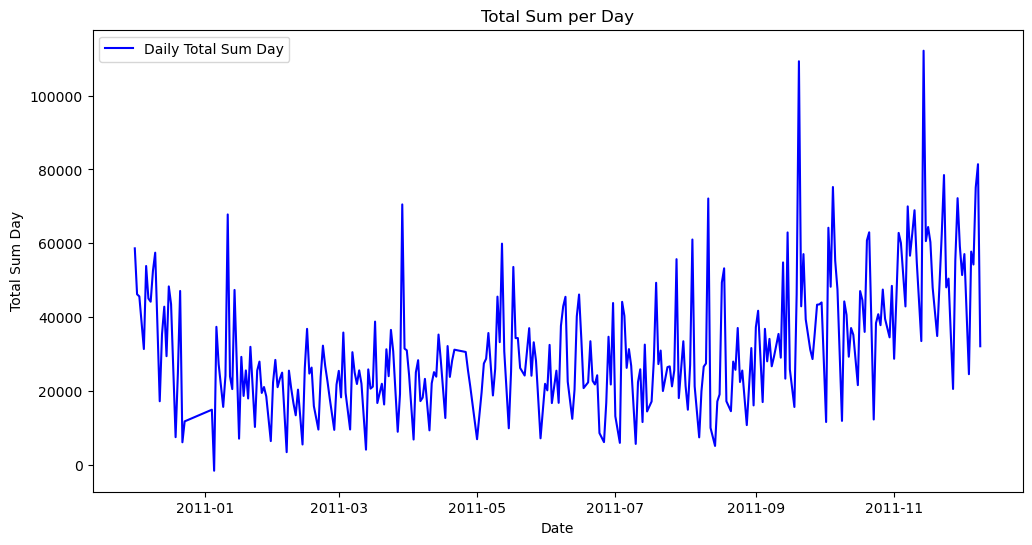

In [86]:
# Step 3: Calculate TotalSumDay for each date
# Add a new column for TotalSum (calculated as UnitPrice * Quantity)
df_Cleaned['TotalSum'] = df_Cleaned['UnitPrice'] * df_Cleaned['Quantity']

# Step 4: Calculate TotalSum for each day
# Group by 'Date' and sum up the 'TotalSum' to get TotalSum for each day
daily_total_sum = df_Cleaned.groupby('Date')['TotalSum'].sum().reset_index()
daily_total_sum = daily_total_sum.rename(columns={'TotalSum': 'TotalSumDay'})

# Step 5: Plot the daily TotalSumDay
plt.figure(figsize=(12, 6))
plt.plot(daily_total_sum['Date'], daily_total_sum['TotalSumDay'], label='Daily Total Sum Day', color='b')
plt.title('Total Sum per Day')
plt.xlabel('Date')
plt.ylabel('Total Sum Day')
plt.legend()
plt.show()




d:\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
d:\Anaconda3\Lib\site-packages\statsmodels\tsa\base\

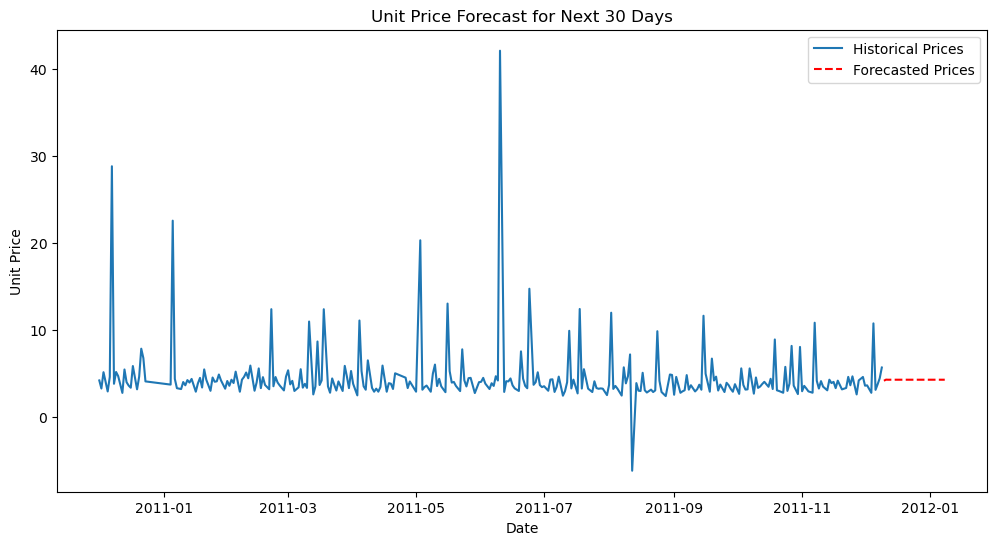

In [88]:
# Step 8.3: Build ARIMA model to predict future price trends
# Note: Order for ARIMA can be tuned for better accuracy
price_time_series = price_time_series.fillna(price_time_series.mean())  # Fill NaNs with mean for modeling purposes
model = ARIMA(price_time_series, order=(1, 1, 1))
model_fit = model.fit()

# Step 8.4: Forecast future prices
forecast_steps = 30  # Predict for the next 30 days
forecast = model_fit.forecast(steps=forecast_steps)

# Plot the forecasted prices
plt.figure(figsize=(12, 6))
plt.plot(price_time_series.index, price_time_series, label='Historical Prices')
plt.plot(pd.date_range(start=price_time_series.index[-1], periods=forecast_steps + 1, inclusive='right'), forecast, color='red', linestyle='--', label='Forecasted Prices')
plt.title('Unit Price Forecast for Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Unit Price')
plt.legend()
plt.show()


##### We can further enhance the recommendation effect based on the relevance between certain products. For example, if customers in a certain cluster often buy a certain type of product, we can find other items that are most frequently purchased with this type of product as part of the recommendation. This recommendation method can use collaborative filtering or market basket analysis.

### RFM weight adjustment and scoring

In [ ]:
# Assign weights to R, F, M based on business priorities
rfm['WeightedRFM'] = rfm['R'] * 0.4 + rfm['F'] * 0.4 + rfm['M'] * 0.2

# Use weighted RFM to redefine clusters using KMeans
X_weighted = rfm[['WeightedRFM']]
kmeans_weighted = KMeans(n_clusters=10, init='k-means++', max_iter=300)
kmeans_weighted.fit(X_weighted)
rfm['kmeans_weighted_cluster'] = kmeans_weighted.labels_


##### Weight each RFM score so that different R, F, and M dimensions have different importance for the final score. For example, if the frequency of customer purchases (F) is particularly important, we can increase its weight and increase its contribution when scoring each customer, so that the cluster analysis can better reflect this type of information.

### Recommendations based on seasonality (products with high demand in a specific month)


In [ ]:
# Analyze the high-demand products for each month
df_Cleaned['Month'] = pd.to_datetime(df_Cleaned['Date']).dt.month

# Find the products with the highest sales volume for each month
monthly_top_products = df_Cleaned.groupby('Month')['StockCode'].value_counts().groupby(level=0).head(3)

# Print the recommended products for each month
print("Monthly Top Products for Recommendation:")
for month in range(1, 13):
    if month in monthly_top_products.index:
        print(f'Month {month}: {list(monthly_top_products.loc[month].index)}')


Monthly Top Products for Recommendation:
Month 1: ['85123A', 22423, 22720]
Month 2: [22720, 22423, '85123A']
Month 3: [22423, '85123A', 22720]
Month 4: [47566, 22423, '85123A']
Month 5: [47566, 23298, '85123A']
Month 6: [47566, '85099B', 23298]
Month 7: [47566, '85099B', 23298]
Month 8: ['85099B', 23298, 23203]
Month 9: ['85099B', 23355, 23203]
Month 10: [22086, '85099B', 23355]
Month 11: [23084, 22086, 23355]
Month 12: ['85123A', 22086, 22423]


##### Using date information to perform seasonal analysis, you can find out the most popular products in a specific month or season and make appropriate recommendations for the corresponding customer clusters. For example, you can make recommendations in advance for the upcoming sales season based on the high-selling products in a specific month.

### Customer migration analysis between clusters


In [ ]:
import pandas as pd

# Assuming we have two different snapshots of RFM data stored in rfm_1 and rfm_2
# Here, I'm creating dummy data to demonstrate the concept

# Create dummy dataframes for two time points
data_1 = {
    'CustomerID': [1, 2, 3, 4, 5],
    'Recency': [10, 20, 15, 40, 5],
    'Frequency': [5, 3, 8, 2, 10],
    'Monetary': [200, 150, 400, 100, 300],
    'kmeans_cluster': [1, 2, 1, 3, 0]
}
rfm_1 = pd.DataFrame(data_1)

data_2 = {
    'CustomerID': [1, 2, 3, 4, 5],
    'Recency': [8, 18, 12, 35, 4],
    'Frequency': [6, 4, 7, 3, 11],
    'Monetary': [210, 160, 380, 120, 320],
    'kmeans_cluster': [1, 2, 0, 3, 0]
}
rfm_2 = pd.DataFrame(data_2)

# Set the CustomerID as the index to make it easier to merge on customer identity
rfm_1.set_index('CustomerID', inplace=True)
rfm_2.set_index('CustomerID', inplace=True)

# Merge the two RFM datasets to compare cluster changes
merged_rfm = rfm_1[['kmeans_cluster']].merge(
    rfm_2[['kmeans_cluster']], 
    left_index=True, 
    right_index=True, 
    suffixes=('_old', '_new')
)

# Identify customers who migrated from one cluster to another
migrated_customers = merged_rfm[merged_rfm['kmeans_cluster_old'] != merged_rfm['kmeans_cluster_new']]

print("Merged RFM Dataframe showing changes:")
print(merged_rfm)

print("\nCustomers who migrated to a different cluster:")
print(migrated_customers)


Merged RFM Dataframe showing changes:
            kmeans_cluster_old  kmeans_cluster_new
CustomerID                                        
1                            1                   1
2                            2                   2
3                            1                   0
4                            3                   3
5                            0                   0

Customers who migrated to a different cluster:
            kmeans_cluster_old  kmeans_cluster_new
CustomerID                                        
3                            1                   0


In [ ]:
# Assume we have RFM data at two different time points, stored in rfm_1 and rfm_2 respectively
# Compare the cluster changes between the two RFM analyses

# Merge two RFM datasets to compare cluster changes
merged_rfm = rfm_1[['kmeans_cluster']].merge(rfm_2[['kmeans_cluster']], left_index=True, right_index=True, suffixes=('_old', '_new'))

# Identify customers who migrated from one cluster to another
migrated_customers = merged_rfm[merged_rfm['kmeans_cluster_old'] != merged_rfm['kmeans_cluster_new']]
print(f"Number of migrated customers: {len(migrated_customers)}")


Number of migrated customers: 1


##### You can study the migration of customers within each cluster over a period of time to see which customers have moved from one cluster to another, especially from high-value groups to low-value groups, so as to adjust the marketing strategy accordingly.

# END

# Reference

https://www.kaggle.com/code/samantas2020/online-retail-clustering-recommendation-system/notebook            |             samira Qasemi · 1y ago